<a href="https://colab.research.google.com/github/Julfikar-Asif/BDSET-AI-COURSE/blob/main/Assignment_0008_3(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
confusion_matrix, accuracy_score, precision_score,
recall_score, f1_score, roc_curve, auc
)

In [3]:
#section A

In [5]:
df = pd.read_csv('/content/data.csv')
print("Dataset shape :",df.shape)
print(df.info())
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Dataset shape : (20, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          20 non-null     object 
 1   Age                19 non-null     float64
 2   Gender             20 non-null     object 
 3   BMI                18 non-null     float64
 4   BloodPressure      19 non-null     float64
 5   Cholesterol        18 non-null     float64
 6   Diabetes           20 non-null     object 
 7   SmokingStatus      20 non-null     object 
 8   NumVisitsLastYear  19 non-null     float64
 9   HospitalStayDays   20 non-null     int64  
 10  MedicationCount    20 non-null     int64  
 11  InsuranceType      20 non-null     object 
 12  City               20 non-null     object 
 13  Readmitted         20 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.3+ KB
None
PatientID            0
Age           

In [6]:
#Section B
df = df.drop(columns=['PatientID'])
df = df.dropna(subset=['Readmitted'])

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Readmitted')
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


Age                  0
Gender               0
BMI                  0
BloodPressure        0
Cholesterol          0
Diabetes             0
SmokingStatus        0
NumVisitsLastYear    0
HospitalStayDays     0
MedicationCount      0
InsuranceType        0
City                 0
Readmitted           0
dtype: int64


In [7]:
from sklearn import preprocessing
#Section C

df['Readmitted'] = df['Readmitted'].map({'Yes': 1, 'No': 0})
df['RiskScore'] = (df['BMI'] + df['BloodPressure'] + df['Cholesterol']) / 3

X = df.drop('Readmitted', axis=1)
y = df['Readmitted']

cat_features = ['Gender', 'Diabetes', 'SmokingStatus', 'InsuranceType', 'City']
preprocessor = ColumnTransformer(
transformers=[
('cat', OneHotEncoder(drop='first'), cat_features)
],
remainder='passthrough'
)

In [8]:
#Section D
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=2
)
scaler = StandardScaler()

In [14]:
#Section E
log_model = Pipeline([
('preprocessor', preprocessor),
('scaler', scaler),
('classifier', LogisticRegression(max_iter=1000))
])


knn_model = Pipeline([
('preprocessor', preprocessor),
('scaler', scaler),
('classifier', KNeighborsClassifier(n_neighbors=7))
])


log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Diabetes',
                                                   'SmokingStatus',
                                                   'InsuranceType',
                                                   'City'])])),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])


Logistic Regression
Confusion Matrix:
 [[2 0]
 [0 3]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

KNN
Confusion Matrix:
 [[2 0]
 [0 3]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


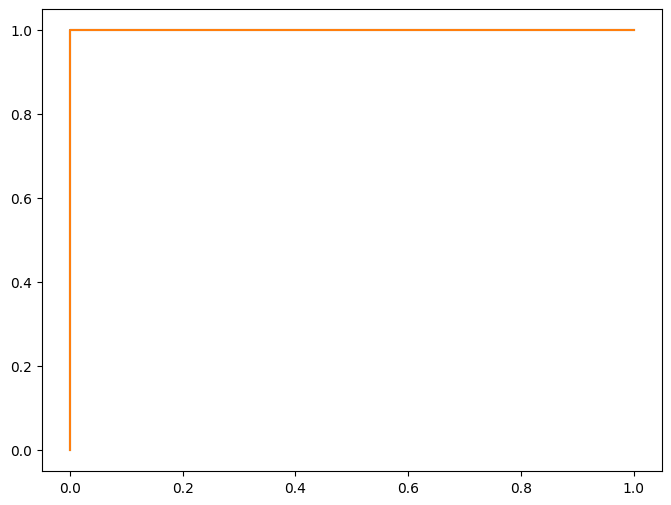

In [15]:
#Section F
models = {
'Logistic Regression': log_model,
'KNN': knn_model
}


results = {}
plt.figure(figsize=(8,6))


for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]


    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    results[name] = {'Accuracy': acc, 'AUC': roc_auc}


    print(f"\n{name}")
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)


    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

/tmp/ipython-input-1303265820.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


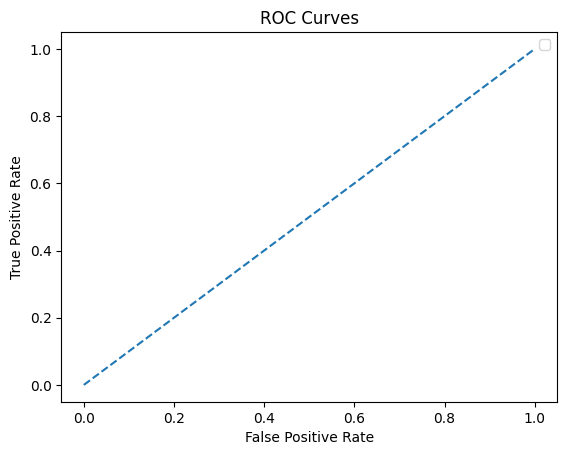

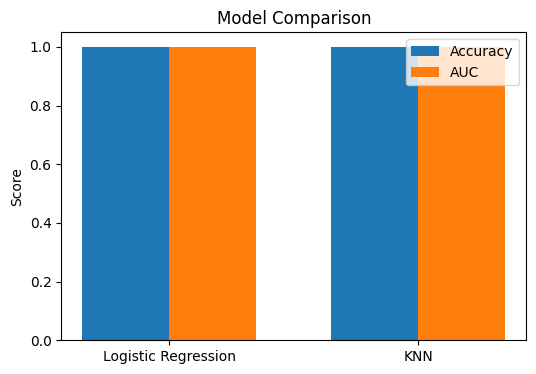

In [17]:
#Section G
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
labels = list(results.keys())
accuracy_vals = [results[m]['Accuracy'] for m in labels]
auc_vals = [results[m]['AUC'] for m in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, accuracy_vals, width, label='Accuracy')
plt.bar(x + width/2, auc_vals, width, label='AUC')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [ ]:
#Section H


Patient readmission is mainly influenced by RiskScore (BMI, Blood Pressure, Cholesterol), Age, Number of Hospital Visits, and Length of Hospital Stay. Medical and lifestyle factors such as Diabetes and Smoking Status also increase the likelihood of readmission.

Both Logistic Regression and KNN showed perfect performance due to the small dataset. However, Logistic Regression is more reliable because it is interpretable, stable, and better suited for healthcare decision-making, whereas KNN is sensitive to data size and scaling.